<a href="https://colab.research.google.com/github/ikonushok/My_studying_Data-Science-and-Neyro-Nets-on-Python/blob/master/%22%D0%98%D1%8E%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D1%83%D1%80%D1%81_(2020)_Pro_%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_1%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

# Создание простой нейронной сети



In [ ]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense # Подключаем класс Dense - полносвязный слой
from tensorflow.keras.optimizers import Adam # Подключаем оптимизатор Adam
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
import numpy as np # Подключаем библиотеку numpy
import pylab # Модуль для построения графиков
from mpl_toolkits.mplot3d import Axes3D # Модуль для трехмерной графики
from google.colab import files #Для загрузки своей картинки
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline 

In [ ]:
model = Sequential() # Создаем пустую модель нейронной сети
model.add(Dense(2, input_dim = 2, use_bias=False)) # Добавляем полносвязный слой с 2мя нейронами (указываем, что на вход принимаем вектор из двух элементв) и отключаем использование нейрона смещения
model.add(Dense(1, use_bias=False)) # Добавляем полносвязный слой с 1 нейроном (выходной слой нашей модели), здесь уже не требуется указывать размерность входных данных, и также отключаем использование нейрона смещения

In [ ]:
model.summary() # Отобразим данные созданной модели

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 2         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [ ]:
weights = model.get_weights() # Получим веса нашей модели (генерируются случайным образом)
print(weights) # Отбразим сгенерированные веса

[array([[0.5716151 , 0.05748582],
       [0.48484242, 0.07816398]], dtype=float32), array([[0.06700671],
       [0.10022247]], dtype=float32)]


In [ ]:
w1 = 0.42 # Зададим коэф. w1 вручную
w2 = 0.15 # Зададим коэф. w2 вручную
w3 = -0.56 # Зададим коэф. w3 вручную
w4 = 0.83 # Зададим коэф. w4 вручную
w5 = 0.93 # Зададим коэф. w5 вручную
w6 = 0.02 # Зададим коэф. w6 вручную
new_weight = [np.array([[w1,w3],[w2,w4]]), np.array([[w5],[w6]])] # Сформируем список весов
print(new_weight) # Отобразим сформированный список весов
model.set_weights(new_weight) # Устанавливаем модели свои собственные веса

[array([[ 0.42, -0.56],
       [ 0.15,  0.83]]), array([[0.93],
       [0.02]])]


In [ ]:
x1 = 7.2 # Установим значение x1
x2 = -5.8 # Установим значение x2
x_train = np.expand_dims(np.array([x1, x2]), 0) # Создадим набор данных для последующего обучения нейронной сети
x_train.shape

(1, 2)

In [ ]:
k = np.array([x1, x2])
k.shape

(2,)

In [ ]:
print(x_train)
print(k)

[[ 7.2 -5.8]]
[ 7.2 -5.8]


In [ ]:
y_linear = model.predict(x_train) # Получим значение выхода сети, передав на вход вектор из двух элементов [x1, x2]
print(y_linear) # Выведем результат работы сети

[[1.8262999]]


In [ ]:
model(x_train)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.8262999]], dtype=float32)>

**Посчитаем выход сети вручную**

In [ ]:
N1 = x1 * w1 + x2 * w2 # Получим значение скрытого нейрона H1
N2 = x1 * w3 + x2 * w4 # Получим значение скрытого нейрона H2
print(N1) # Выведем значение нейрона H1
print(N2) # Выведем значение нейрона H2

2.154
-8.846


In [ ]:
Y_linear = N1 * w5 + N2 * w6 # Считаем выход сети
print(Y_linear) # Отобразим вывод сети, посчитанный вручную

1.8263000000000003


In [ ]:
print('Значение предикта модели:', round(y_linear[0][0], 6))
print('Значение посчитанное вручную:', round(Y_linear, 6))

Значение предикта модели: 1.8263
Значение посчитанное вручную: 1.8263


# Функции активации

## sigmoid (сигмоид)


![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/36f792c44c0a7069ad01386452569d6e34fe95d7) ![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/Activation_logistic.svg/120px-Activation_logistic.svg.png)

In [ ]:
def sigmoid(x): # Зададим функцию расчета сигмоиды
  return 1/(1+np.e ** (-x) )

In [ ]:
# Пересоздадим нейронную сеть, указав в качестве функции активации сигмоиду
model_sigmoid = Sequential() # Создаем пустую модель нейронной сети
model_sigmoid.add(Dense(2, input_dim = 2, activation='sigmoid', use_bias=False)) # Добавляем полносвязный слой с 2мя нейронами (указываем, что на вход принимаем вектор из двух элементов), функция активация - sigmoid,  и отключаем использование нейрона смещения
model_sigmoid.add(Dense(1, activation='sigmoid', use_bias=False)) # Добавляем полносвязный слой с 1 нейроном (выходной слой нашей модели), здесь уже не требуется указывать размерность входных данных, функция активация - sigmoid, и также отключаем использование нейрона смещения
model_sigmoid.summary() # Отобразим структуру созданной сети (должна совпадать с первой моделью)
model_sigmoid.set_weights(new_weight) # Установим посчитанные выше веса

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 2         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Выполним те же самые шаги, что и выше
y_sigmoid = model_sigmoid.predict(x_train) # Получим значение выхода сети, передав на вход вектор из двух элементов [x1, x2]
print(y_sigmoid) # Выведем результат работы сети

[[0.69705683]]


*Посчитаем значение выхода сети вручную*

In [ ]:
H1_sigmoid = sigmoid(x1 * w1 + x2 * w2) # Получим значение скрытого нейрона H1
H2_sigmoid = sigmoid(x1 * w3 + x2 * w4) # Получим значение скрытого нейрона H2
print(H1_sigmoid) # Выведем значение нейрона H1
print(H2_sigmoid) # Выведем значение нейрона H2

0.8960419706149801
0.00014393569134056814


In [ ]:
Y_sigmoid = sigmoid(H1_sigmoid * w5 + H2_sigmoid * w6) # Считаем выход сети
print(Y_sigmoid) # Отобразим вывод сети, посчитанный вручную

0.6970568720142808


In [ ]:
print('Значение предикта модели:', round(y_sigmoid[0][0], 6))
print('Значение посчитанное вручную:', round(Y_sigmoid, 6))

Значение предикта модели: 0.697057
Значение посчитанное вручную: 0.697057


## relu (линейный выпрямитель)


![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/f4353f4e3e484130504049599d2e7b040793e1eb) ![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Activation_rectified_linear.svg/120px-Activation_rectified_linear.svg.png)

In [ ]:
def relu(x): # Зададим функцию расчета сигмоиды
  return np.clip(x, 0, np.inf)

In [ ]:
# Пересоздадим нейронную сеть, указав в качестве функции активации relu
model_relu = Sequential() # Создаем пустую модель нейронной сети
model_relu.add(Dense(2, input_dim = 2, activation='relu', use_bias=False)) # Добавляем полносвязный слой с 2мя нейронами (указываем, что на вход принимаем вектор из двух элементв), функция активация - relu,  и отключаем использование нейрона смещения
model_relu.add(Dense(1, activation='relu', use_bias=False)) # Добавляем полносвязный слой с 1 нейроном (выходной слой нашей модели), здесь уже не требуется указывать размерность входных данных, функция активация - relu, и также отключаем использование нейрона смещения
model_relu.summary() # Отобразим структуру созданной сети (должна совпадать с первой моделью)
model_relu.set_weights(new_weight) # Установим посчитанные выше веса

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 2         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Выполним теже самые шаги, что и выше
y_relu = model_relu.predict(x_train) # Получим значение выхода сети, передав на вход вектор из двух элементов [x1, x2]
print(y_relu) # Выведем результат работы сети

[[2.0032198]]


*Посчитаем значение выхода сети вручную*

In [ ]:
H1_relu = relu(x1 * w1 + x2 * w2) # Получим значение скрытого нейрона H1
H2_relu = relu(x1 * w3 + x2 * w4) # Получим значение скрытого нейрона H2
print(H1_relu) # Выведем значение нейрона H1
print(H2_relu) # Выведем значение нейрона H2

2.154
0.0


In [ ]:
Y_relu = relu(H1_relu * w5 + H2_relu * w6) # Считаем выход сети
print(Y_relu) # Отобразим вывод сети, посчитанный вручную

2.0032200000000002


In [ ]:
print('Значение предикта модели:', round(y_relu[0][0], 6))
print('Значение посчитанное вручную:', round(Y_relu, 6))

Значение предикта модели: 2.00322
Значение посчитанное вручную: 2.00322


## tanh (гиперболический тангенс)



![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/5fd13a1c501e64926c12d52b620f1e656251fc15) ![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Activation_tanh.svg/120px-Activation_tanh.svg.png)

In [ ]:
def th(x): # Зададим функцию расчета гиперболического тангенса
  return (np.e ** x - np.e ** (-x)) / (np.e ** x + np.e ** (-x))

In [ ]:
# Пересоздадим нейронную сеть, указав в качестве функции активации - tanh
model_th = Sequential() # Создаем пустую модель нейронной сети
model_th.add(Dense(2, input_dim = 2, activation=th, use_bias=False)) # Добавляем полносвязный слой с 2мя нейронами (указываем, что на вход принимаем вектор из двух элементв), функция активация - tanh,  и отключаем использование нейрона смещения
model_th.add(Dense(1, activation=th, use_bias=False)) # Добавляем полносвязный слой с 1 нейроном (выходной слой нашей модели) (здесь уже не требуется указывать размерность входных данных), функция активация - tanh, и так же отключаем использование нейрона смещения
model_th.summary() # Отобразим структуру созданной сети (должна совпадать с первой моделью)
model_th.set_weights(new_weight) # Установим посчитанные выше веса

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 2         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Выполним теже самые шаги, что и выше
y_th = model_th.predict(x_train) # Получим значение выхода сети, передав на вход вектор из двух элементов [x1, x2]
print(y_th) # Выведем результат работы сети

[[0.70906264]]


*Посчитаем значение выхода сети вручную*

In [ ]:
H1_th = th(x1 * w1 + x2 * w2) # Получим значение скрытого нейрона H1
H2_th = th(x1 * w3 + x2 * w4) # Получим значение скрытого нейрона H2
print(H1_th) # Выведем значение нейрона H1
print(H2_th) # Выведем значение нейрона H2

0.9734366670870239
-0.9999999585531038


In [ ]:
Y_th = th(H1_th * w5 + H2_th * w6) # Считаем выход сети
print(Y_th) # Отобразим вывод сети, посчитанный вручную

0.709062603515898


In [ ]:
print('Значение предикта модели:', round(y_th[0][0], 6))
print('Значение посчитанное вручную:', round(Y_th, 6))

Значение предикта модели: 0.709063
Значение посчитанное вручную: 0.709063


# Функции ошибок



In [ ]:
# Зададим значение, которое должна возвращать наша сеть
y_real = 0.34

In [ ]:
# Возьмем значение, которое возвращает одна из рассмотренных выше сетей, например, сеть model_relu
print ('Значение, к которому должна стремиться наша модель:', y_real)
print ('Текущее значение, которое возвращает наша модель:', y_relu[0][0])

Значение, к которому должна стремиться наша модель: 0.34
Текущее значение, которое возвращает наша модель: 2.0032198


In [ ]:
# Создадим список y_true, где будут храниться значения, к которым должна стремиться модель, и список y_pred, где будут храниться текущие значения, которые возвращает модель
y_true = [y_real]
y_pred = [y_relu[0][0]]
print(y_true)
print(y_pred)

[0.34]
[2.0032198]


## MAE

mean_absolute_error (средняя абсолютная ошибка)

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/3ef87b78a9af65e308cf4aa9acf6f203efbdeded)


In [ ]:
n = 1 # Задаем количество элементов
mae = 0 # Инициализируем начальное значение ошибки
for i in range(n): # Проходим по всем элементам
  mae += abs(y_true[i] - y_pred[i]) # Увеличиваем значение ошибки для текущего элемента
mae /= n # Считаем среднее значение
print ('Значение ошибки: ', mae) # Выводим посчитанное значение ошибки

Значение ошибки:  1.6632198429107665


In [ ]:
# Так как у нас всего одно выходное значение и один входной набор данных, то можно записать просто:
mae2 = abs(y_real - y_relu[0][0]) # Считаем значение ошибки для единичного набора данных
print(mae2) # Выводим посчитанное значение

1.6632198429107665


## MSE

mean_squared_error (среднеквадратическая ошибка)

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e)

In [ ]:
n = 1 # Задаем количество элементов
mse = 0 # Инициализируем начальное значение ошибки
for i in range(n): # Проходим по всем элементам
  mse += (y_true[i] - y_pred[i]) ** 2 # Увеличиваем значение ошибки для текущего элемента
mse /= n # Считаем среднее значение
print ('Значение ошибки: ', mse) # Выводим посчитанное значение ошибки

In [ ]:
# Так как у нас всего одно выходное значение и один входной набор данных, то можно записать просто:
mse2 = (y_real - y_relu[0][0]) ** 2 # Считаем значение ошибки для единичного набора данных
print(mse2) # Выводим посчитанное значение

2.766300245852115


## BINARY_CROSSENTROPY

бинарная кроссэнтропия

![alt text](https://miro.medium.com/max/1096/1*rdBw0E-My8Gu3f_BOB6GMA.png)

In [ ]:
# Так как у нас всего одно выходное значение и один входной набор данных, то можно записать просто:
bc = - (y_real * np.log(y_sigmoid[0][0])  + (1 - y_real) * np.log(1 - y_sigmoid[0][0])) # Считаем значение ошибки
print(bc) # Выводим посчитанное значение

0.9108806649907836


# Оптимизаторы




In [ ]:
y_train = np.array(y_true) # Создадим numpy-массив значений, к которым должна стремиться модель (в нашем случае одно значение)
print(y_train) # Выведем сформированный массив
print(y_train.shape) # Выведем размерность сформированного массива

[0.34]
(1,)


In [ ]:
x_train.shape

In [ ]:
# Создадим модель, аналогичную ранее созданной с relu-активацией
model_test = Sequential() # Создаем пустую модель нейронной сети
model_test.add(Dense(2, input_dim = 2, activation='linear', use_bias=False)) # Добавляем полносвязный слой с 2мя нейронами (указываем, что на вход принимаем вектор из двух элементв), функция активация - relu,  и отключаем использование нейрона смещения
model_test.add(Dense(1, activation='relu', use_bias=False)) # Добавляем полносвязный слой с 1 нейроном (выходной слой нашей модели), здесь уже не требуется указывать размерность входных данных, функция активация - relu, и также отключаем использование нейрона смещения
model_test.set_weights(new_weight) # Установим посчитанные выше веса

In [ ]:
model_test.compile(optimizer='adam', loss='mse', metrics=['mae']) # Компилируем нашу модель, указав используемый оптимайзер, функцию ошибки и метрику
#model_test.compile(optimizer=Adam(0.001), loss='mse') # Альтернативный способ указания оптимизатора

In [ ]:
model_test.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 2         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [ ]:
l = model_test.train_on_batch(x_train, y_train) # Обучаем модель на одном наборе данных методом train_on_batch. Метод вернет ошибку и метрику

In [ ]:
print(l) # Отобразим ошибку после обучения

2.209087371826172


In [ ]:
print(new_weight) # Выведем веса, которые были назначены модели в самом начале

[array([[ 0.42, -0.56],
       [ 0.15,  0.83]]), array([[0.93],
       [0.02]])]


In [ ]:
print(model_test.get_weights()) # Выведем измененные веса после одного шага обучения

[array([[ 0.41899997, -0.56100005],
       [ 0.15100004,  0.83100003]], dtype=float32), array([[0.92899996],
       [0.02100003]], dtype=float32)]


In [ ]:
for i in range(1000): # Пройдемся в цикле 1000 раз
  loss = model_test.train_on_batch(x_train, y_train) # Выполним на каждом шаге обучение нашей модели
print('Ошибка (mse) после 1000 шагов', loss)

Ошибка (mse) после 1000 шагов 3.206324095117452e-13


In [ ]:
y_pred = model_test.predict(x_train) # Получаем результат нашей модели
print('Требуемое значение:', y_real)
print('Значение модели:', y_pred[0][0])

Требуемое значение: 0.34
Значение модели: 0.33999944


In [ ]:
print('Веса модели \n', model_test.get_weights())

Веса модели 
 [array([[ 0.3580763 , -0.6438555 ],
       [ 0.21192369,  0.9138554 ]], dtype=float32), array([[0.87291133],
       [0.08429354]], dtype=float32)]


# Демонстрация градиентного спуска



In [ ]:
def makeData2(model, x_train, y_train): # Функция возвращает сетку координат весов и массив ошибки, соответствующей этой сетке
    x = np.arange(-1.5, 1.5, 0.05) # Создаем массив шагов по шкале x
    y = np.arange(-1.5, 1.5, 0.05) # Создаем массив шагов по шкале y
    xgrid, ygrid = np.meshgrid(x, y) # Создаем пересечение всех возможных точек пространства  xy

    zgrid = np.zeros_like(xgrid) # Сздаем массив zgrid (в нем будет храниться значение ошибки)
    for i in range (x.shape[0]): # Проходим по всем шагам по оси x
      z_add = np.zeros(x.shape[0]) # Создаем массив из нулей, в который будем добавлять значения ошибки
      for j in range(y.shape[0]): # Проходим по всем шагам по оси y
        model_d.set_weights([np.array([[x[i]],[y[j]]])]) # Устанавливаем веса для модели в соответствии с текущими шагами по осям x и y
        loss = model_d.train_on_batch(x_train, y_train) # Обучаем модель на установленных весах и получаем значение ошибки
        z_add[j] = loss # Записываем полученное значение ошибки в соответствующее место массива z_add
      zgrid[i] = z_add # Записываем сформированный массив z_add в общий массив, хранящий значение ошибки
    return xgrid, ygrid, zgrid # Возвращаем шаги по осям x и y (xgrid, ygrid) и массив, содержащий значение ошибки (zgrid)

In [ ]:
model_d = Sequential() # Создаем класс модели
model_d.add(Dense(1, input_dim=2, activation='linear', use_bias=False)) # Добавляем один Dense-слой с линейной активацией и отключенным bias'ом
model_d.compile(optimizer=Adam(0.001), loss='mse') # Компилируем модель, указав оптимайзер и ошибку

In [ ]:
start_weights = model_d.get_weights() # Запомним стартовое значение весов модели в переменной start_weights
print ('Стартовые веса модели: ', start_weights) # Отобразим стартовые веса модели

Стартовые веса модели:  [array([[0.45289552],
       [0.36671495]], dtype=float32)]


In [ ]:
start_weights = [np.array([[-1.2], [1.1]])] # Зададим свои стартовые веса модели
model_d.set_weights(start_weights) # Установим модели указанные веса

In [ ]:
x_train = np.array([[1,0],[0,1]]) # Зададим x_train
y_train = np.array([1,-1]) # Зададим y_train

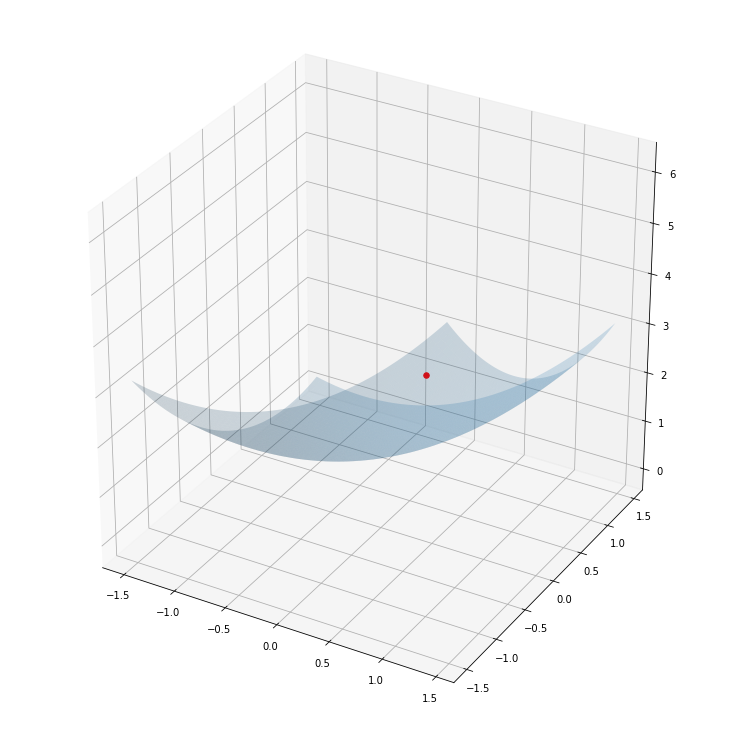

In [ ]:
x, y, z = makeData2(model_d, x_train, y_train) # Вызываем функцию получения сетки весов и значений ошибки в этих весах
model_d.set_weights(start_weights) # Устанвливаем модели стартовое значение весов
l = model_d.train_on_batch(x_train, y_train) # Получим значение ошибки при стартовых весах
fig = pylab.figure(figsize=(10,10)) # Создаем объект pylab.figure для построения графиков
axes = Axes3D(fig) # Создаем объект Axes3D для построения трехмерного графика
axes.plot_surface(x, y, z, rstride=1, cstride=1, alpha = 0.2) # Рисуем поверхность по параметрам x (веса w1), y (веса w2), z (значения ошибок)
axes.scatter(start_weights[0][1], start_weights[0][0], l, s=30, color='red') # Рисуем стартовое значение ошибки (l) при стартовых весах
pylab.show() # Отображаем график

In [ ]:
save_weights = [] # Создаем пустой список, в котором будем сохранять веса модели после каждого шага обучения
losses = [] # Создаем пустой список, в котором будем сохранять значение ошибки после каждого шага обучения
for i in range(4000): # Проходим в цикле 4000 раз
  save_weights.append(model_d.get_weights()[0]) # Добавляем в список весов текущее значение весов модели
  l = model_d.train_on_batch(x_train, y_train) # Обучаем модель методом train_on_batch и получаем значение ошибки
  losses.append(l) # Добавляем полученное значение ошибки в список ошибок
print(l) # Выведем ошибку после последнего шага обучения

0.0001724994508549571


In [ ]:
save_weights = np.array(save_weights) # Преобразуем список save_weights в numpy-массив
save_weights = save_weights.reshape(-1,2) # Изменим размерность сформированного массива
print(save_weights[-1]) # Отобразим последнее значение в массиве (соответствует текущим весам модели)
print(losses[-1]) # Отобразим последнее значение в списке ошибок

[ 0.9938851 -0.9824613]
0.0001724994508549571


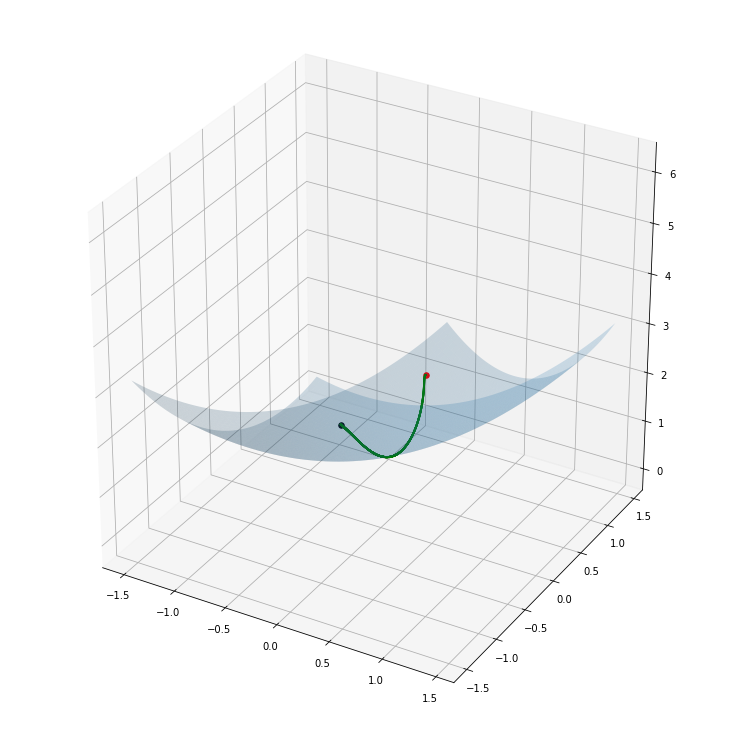

In [ ]:
fig = pylab.figure(figsize=(10,10)) # Создаем объект pylab.figure для построения графиков
axes = Axes3D(fig) # Создаем объект Axes3D для построения трехмерного графика
axes.plot_surface(x, y, z, rstride=1, cstride=1, alpha = 0.2) # Рисуем поверхность по параметрам x (веса w1), y (веса w2), z (значения ошибок)
axes.scatter(save_weights[0,1], save_weights[0,0], losses[0], s=30, color='red') # Рисуем стартовое значение ошибки (losses[0])
axes.scatter(save_weights[:,1], save_weights[:,0], losses[:], s=1, color='green') # Рисуем все значения ошибок
axes.scatter(save_weights[-1,1], save_weights[-1,0], losses[-1], s=30, color='black') # Рисуем финальное значение ошибки (losses[-1])
pylab.show()

# Распознавание рукописных цифр MNIST

## Подготовка данных



In [ ]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data() #Загрузка данных Mnist

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train_org[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

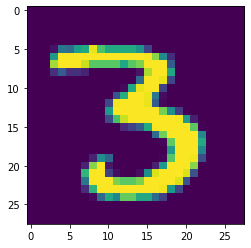

In [ ]:
n = 12 #Номер картинки
plt.imshow(x_train_org[n], cmap='viridis') #Отрисовка картинки
plt.show() # Вывод картинки

In [ ]:
#Меняем формат входных картинок с 28х28 на 784х1
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)
print(x_train_org.shape)
print(x_train.shape)

(60000, 28, 28)
(60000, 784)


In [ ]:
#Нормализуем входные картинки
x_train = x_train.astype('float32') # преобразовываем x_train в тип float (цифры с плавающей точкой)
x_train = x_train / 255 # делим на 255, чтобы диапазон был от 0 до 1
x_test = x_test.astype('float32') # преобразовываем x_test в тип float (цифры с плавающей точкой)
x_test = x_test / 255 # делим на 255, чтобы диапазон был от 0 до 1

In [ ]:
y_train_org[0]

5

In [ ]:
utils.to_categorical(y_train_org[0], 10)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [ ]:
#Выводим размер y_train
#60 тысяч примеров, каждый размера 10 (так как 10 классов)
print(y_train.shape)

(60000, 10)


In [ ]:
print(y_train[n]) #Выводим пример одного выходного вектора

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(y_train_org.shape)

(60000,)


In [ ]:
print(y_train_org[36])

6


## Создание нейронной сети



In [ ]:
model = Sequential() # Создаём сеть прямого распространения
model.add(Dense(800, input_dim=784, activation="relu")) # Добавляем полносвязный слой на 800 нейронов с relu-активацией
model.add(Dense(400, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
model.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель
print(model.summary()) #Вывод структуры модели

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_31 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_32 (Dense)             (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


## Обучение нейронной сети



In [ ]:
#fit - функция обучения нейронки
#x_train, y_train - обучающая выборка, входные и выходные данные
#batch_size - размер батча, количество примеров, которое обрабатывает нейронка перед одним изменением весов
#epochs - количество эпох, когда нейронка обучается на всех примерах выборки
#verbose - 0 - не визуализировать ход обучения, 1 - визуализировать
model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
375/375 [==============================] - 2s 6ms/step - loss: 0.2325 - accuracy: 0.9295 - val_loss: 0.1187 - val_accuracy: 0.9637
Epoch 2/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0820 - accuracy: 0.9750 - val_loss: 0.0886 - val_accuracy: 0.9727
Epoch 3/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0509 - accuracy: 0.9847 - val_loss: 0.0818 - val_accuracy: 0.9755
Epoch 4/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0343 - accuracy: 0.9883 - val_loss: 0.0925 - val_accuracy: 0.9734
Epoch 5/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0275 - accuracy: 0.9912 - val_loss: 0.0860 - val_accuracy: 0.9780
Epoch 6/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0203 - accuracy: 0.9932 - val_loss: 0.0941 - val_accuracy: 0.9768
Epoch 7/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0212 - accuracy: 0.9930 - val_loss: 0.0892 - val_accuracy: 0.9783
Epoch 

In [ ]:
model.save_weights('model.h5')
model.load_weights('model.h5')

## Распознавание рукописных цифр



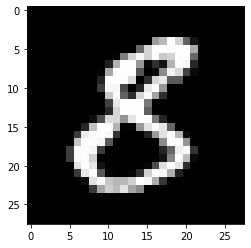

In [ ]:
n_rec = 1234 #Номер тестовой цифры, которую будем распознавать
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA')) # Нарисуем картинку из тестового набора под номером n_rec
plt.show()

In [ ]:
#Выбираем нужную картинку из тестовой выборки
x = x_test[n_rec]
print(x.shape)

(784,)


In [ ]:
#Добавляем одну размерность в конце, чтобы нейронка могла распознать пример
#Потому что нейронка принимает именно массив примеров для распознавания
#Мы делаем массив из одного примера
x = np.expand_dims(x, axis=0)
print(x.shape)

(1, 784)


In [ ]:
prediction = model.predict(x) #Распознаём наш пример

In [ ]:
print(prediction) #Выводим результат, это 10 цифр

[[8.5955486e-11 4.7798343e-09 5.3934507e-08 9.7241127e-06 2.8725041e-12
  8.0395603e-06 7.9253193e-10 8.7632422e-11 9.9998212e-01 9.1010272e-10]]


In [ ]:
prediction = np.argmax(prediction) # Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)
print(prediction)

8


In [ ]:
print(y_test_org[n_rec]) #выводим правильный ответ, для сравнения

8


# Глоссарий

**Функции активации**

https://keras.io/activations/ - документация

https://ru-keras.com/activation-function/ - русскоязычная документация

*   sigmoid - на выходе значения от 0 до 1
*   relu - на выходе значения от 0 до +∞
*   tanh - на выходе значения от -1 до +1
*   softmax - сумма значения выходов всех нейронов равна 1

**Функции ошибок**

https://keras.io/losses/ - документация

https://ru-keras.com/loss/ - русскоязычная документация


*   mse - среднеквадратичное отклонение
*   mae - среднее абсолютное значение
*   binary_crossentropy - бинарная кроссэнтропия
*   categorical_crossentropy - категориальная кроссэнтропия

**Оптимизаторы**

https://keras.io/optimizers/ - документация

https://ru-keras.com/optimizer/ - русскоязычная документация



*   Adam
*   RMSProp
*   Adadelta

**Градиентный спуск** - процесс поиска минимума функции ошибки

**MNIST** - набор изображений рукописных цифр 28х28 пикселей

**Способы обучения сети:**

*   .train_on_batch - один шаг обучения на фиксированном наборе данных
*   .fit - итерационное обучение сети с возможностью указания количества итераций (epochs) и размера пакета с обучающими данными (batch_size)

**Загрузка изображения**

image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’)



